In [52]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

In [53]:
# Function to draw confusion matrix
def draw_cm(actual, predicted, model_name):
    cm = metrics.confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [54]:
# Load the dataset
df = pd.read_csv('/Users/vaishakhmenon/Downloads/IIMK_DSAI_W13_Graded Assignment 13.2_Titanic Data Set-2 (1).csv')

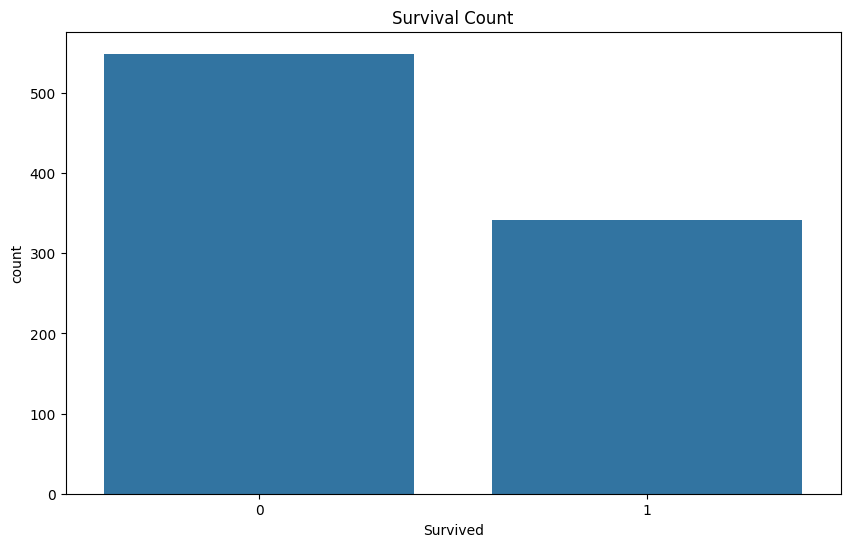

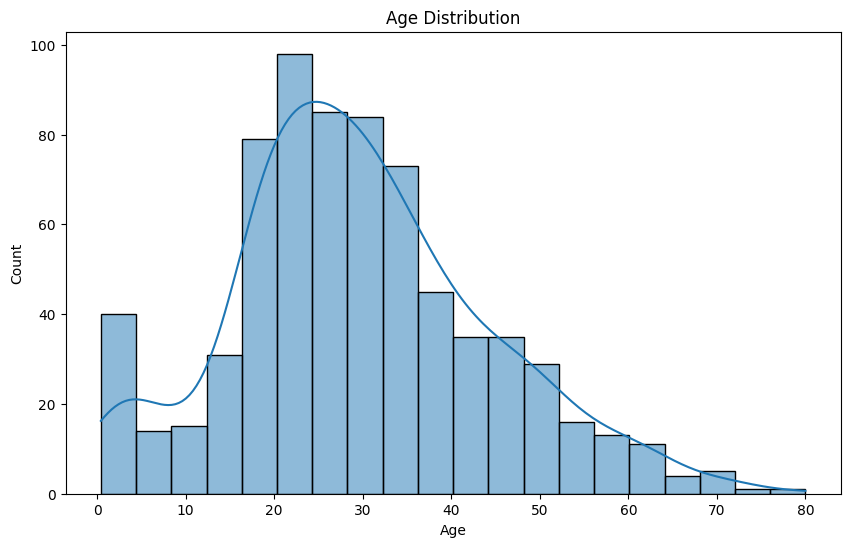

In [55]:
# Visualize data with EDA graphs
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

In [56]:
# Prepare data for classification model
# Drop columns with missing values
df = df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

In [57]:
# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [58]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [59]:
# Split data into train and test sets
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Perform scaling of data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print shapes of training and test data
print('Training data shape:', X_train.shape)
print('Test data shape:', X_test.shape)

Training data shape: (712, 8)
Test data shape: (179, 8)


In [61]:
# Build and train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [62]:
# Build and train Perceptron model
perceptron = Perceptron()
perceptron.fit(X_train_scaled, y_train)


Perceptron()

In [63]:
# Evaluate KNN model
knn_pred = knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
knn_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])


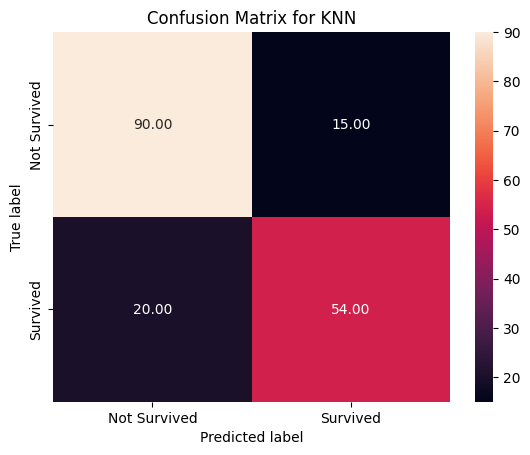

In [64]:
# Draw confusion matrix for KNN model
draw_cm(y_test, knn_pred, 'KNN')

In [65]:
# Evaluate Perceptron model
perceptron_pred = perceptron.predict(X_test_scaled)
perceptron_accuracy = accuracy_score(y_test, perceptron_pred)
perceptron_conf_matrix = confusion_matrix(y_test, perceptron_pred)
perceptron_f1 = f1_score(y_test, perceptron_pred)
perceptron_roc_auc = roc_auc_score(y_test, perceptron.decision_function(X_test_scaled))


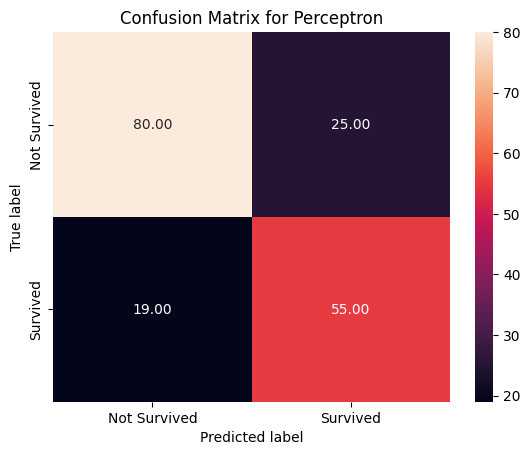

In [66]:
# Draw confusion matrix for Perceptron model
draw_cm(y_test, perceptron_pred, 'Perceptron')

In [67]:
# Print KNN model evaluation metrics
print('KNN Model:')
print('Accuracy:', knn_accuracy)
print('Confusion Matrix:\n', knn_conf_matrix)
print('F1 Score:', knn_f1)
print('ROC AUC:', knn_roc_auc)


KNN Model:
Accuracy: 0.8044692737430168
Confusion Matrix:
 [[90 15]
 [20 54]]
F1 Score: 0.7552447552447552
ROC AUC: 0.8527027027027028


In [68]:
# Print Perceptron model evaluation metrics
print('\nPerceptron Model:')
print('Accuracy:', perceptron_accuracy)
print('Confusion Matrix:\n', perceptron_conf_matrix)
print('F1 Score:', perceptron_f1)
print('ROC AUC:', perceptron_roc_auc)



Perceptron Model:
Accuracy: 0.7541899441340782
Confusion Matrix:
 [[80 25]
 [19 55]]
F1 Score: 0.7142857142857143
ROC AUC: 0.7813384813384814


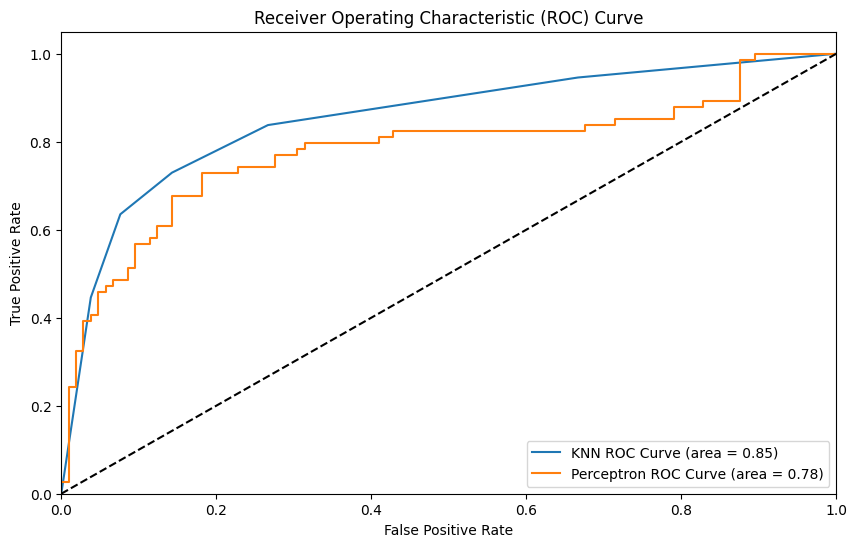

In [69]:
# Plot ROC curves for both models
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1])
perceptron_fpr, perceptron_tpr, _ = roc_curve(y_test, perceptron.decision_function(X_test_scaled))

plt.figure(figsize=(10, 6))
plt.plot(knn_fpr, knn_tpr, label='KNN ROC Curve (area = %0.2f)' % knn_roc_auc)
plt.plot(perceptron_fpr, perceptron_tpr, label='Perceptron ROC Curve (area = %0.2f)' % perceptron_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [70]:
# Compare the performance of KNN and Perceptron classifiers
print('\nPerformance Comparison:')
print(f'KNN Accuracy: {knn_accuracy}, F1 Score: {knn_f1}, ROC AUC: {knn_roc_auc}')
print(f'Perceptron Accuracy: {perceptron_accuracy}, F1 Score: {perceptron_f1}, ROC AUC: {perceptron_roc_auc}')


Performance Comparison:
KNN Accuracy: 0.8044692737430168, F1 Score: 0.7552447552447552, ROC AUC: 0.8527027027027028
Perceptron Accuracy: 0.7541899441340782, F1 Score: 0.7142857142857143, ROC AUC: 0.7813384813384814


In [71]:
#The KNN classifier outperforms the Perceptron classifier across all metrics. 
#The KNN model shows higher accuracy, better balance between precision and recall (F1 Score), and class discrimination ability (ROC AUC). This indicates that the KNN model is more effective in predicting passenger survival in this dataset compared to the Perceptron model.